In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Korea Income and Welfare.csv')

Replace null values with the column's mean

In [3]:
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]: 
        df[col] = df[col].fillna(df[col].mean())

In [4]:
df.dtypes

id                      int64
year                    int64
wave                    int64
region                  int64
income                float64
family_member           int64
gender                  int64
year_born               int64
education_level         int64
marriage                int64
religion                int64
occupation             object
company_size           object
reason_none_worker     object
dtype: object

In [5]:
avg_income = df['income'].mean()


In [6]:
avg_income

3441.1223268686776

In [7]:
df['above_avg_income'] = df['income'] >= avg_income
# Drop non-predictive columns
X = df.copy()
X = X.drop(columns=["id", "income", 'above_avg_income'])

# One-hot encode categorical columns
categorical_cols = ['gender', 'region', 'education_level', 'marriage', 'religion', 'occupation', 'company_size', 'reason_none_worker', 'wave', 'family_member']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Target variable
y = df['above_avg_income']

# Check the shapes to ensure consistency
print(X.shape) 
print(y.shape)

(92857, 324)
(92857,)


In [8]:
X.head(2)

,year,year_born,gender_1,gender_2,region_1,region_2,region_3,region_4,region_5,region_6,...,wave_14,family_member_1,family_member_2,family_member_3,family_member_4,family_member_5,family_member_6,family_member_7,family_member_8,family_member_9
0,2005,1936,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2011,1936,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


Check our columns thoroughly

In [9]:
for col in X.columns:
    print(col)

year
year_born
gender_1
gender_2
region_1
region_2
region_3
region_4
region_5
region_6
region_7
education_level_2
education_level_3
education_level_4
education_level_5
education_level_6
education_level_7
education_level_8
education_level_9
marriage_0
marriage_1
marriage_2
marriage_3
marriage_4
marriage_5
marriage_6
marriage_9
religion_1
religion_2
religion_9
occupation_ 
occupation_1001
occupation_1002
occupation_1009
occupation_1011
occupation_1012
occupation_111
occupation_112
occupation_113
occupation_12
occupation_120
occupation_121
occupation_122
occupation_131
occupation_132
occupation_133
occupation_134
occupation_135
occupation_139
occupation_141
occupation_142
occupation_143
occupation_144
occupation_145
occupation_149
occupation_151
occupation_152
occupation_153
occupation_154
occupation_156
occupation_157
occupation_159
occupation_161
occupation_162
occupation_163
occupation_164
occupation_165
occupation_171
occupation_172
occupation_173
occupation_182
occupation_183
occupat

In [10]:
y.head(2)

0    False
1    False
Name: above_avg_income, dtype: bool

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X.shape)  
print(y.shape)  


(92857, 324)
(92857,)


In [13]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

C:\Users\steve\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Check column types

In [14]:
for d, j in zip(X_test.dtypes, X_test.columns):
    print(f"Column: {j}, Data Type: {d}")


Column: year, Data Type: int64
Column: year_born, Data Type: int64
Column: gender_1, Data Type: bool
Column: gender_2, Data Type: bool
Column: region_1, Data Type: bool
Column: region_2, Data Type: bool
Column: region_3, Data Type: bool
Column: region_4, Data Type: bool
Column: region_5, Data Type: bool
Column: region_6, Data Type: bool
Column: region_7, Data Type: bool
Column: education_level_2, Data Type: bool
Column: education_level_3, Data Type: bool
Column: education_level_4, Data Type: bool
Column: education_level_5, Data Type: bool
Column: education_level_6, Data Type: bool
Column: education_level_7, Data Type: bool
Column: education_level_8, Data Type: bool
Column: education_level_9, Data Type: bool
Column: marriage_0, Data Type: bool
Column: marriage_1, Data Type: bool
Column: marriage_2, Data Type: bool
Column: marriage_3, Data Type: bool
Column: marriage_4, Data Type: bool
Column: marriage_5, Data Type: bool
Column: marriage_6, Data Type: bool
Column: marriage_9, Data Type: 

In [15]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.3f}")


Overall Accuracy: 0.842


In [16]:
[col for col in X_test]

['year',
 'year_born',
 'gender_1',
 'gender_2',
 'region_1',
 'region_2',
 'region_3',
 'region_4',
 'region_5',
 'region_6',
 'region_7',
 'education_level_2',
 'education_level_3',
 'education_level_4',
 'education_level_5',
 'education_level_6',
 'education_level_7',
 'education_level_8',
 'education_level_9',
 'marriage_0',
 'marriage_1',
 'marriage_2',
 'marriage_3',
 'marriage_4',
 'marriage_5',
 'marriage_6',
 'marriage_9',
 'religion_1',
 'religion_2',
 'religion_9',
 'occupation_ ',
 'occupation_1001',
 'occupation_1002',
 'occupation_1009',
 'occupation_1011',
 'occupation_1012',
 'occupation_111',
 'occupation_112',
 'occupation_113',
 'occupation_12',
 'occupation_120',
 'occupation_121',
 'occupation_122',
 'occupation_131',
 'occupation_132',
 'occupation_133',
 'occupation_134',
 'occupation_135',
 'occupation_139',
 'occupation_141',
 'occupation_142',
 'occupation_143',
 'occupation_144',
 'occupation_145',
 'occupation_149',
 'occupation_151',
 'occupation_152',
 'oc

Check accuracies

In [17]:
# Filter male and female entries
X_test_male = X_test[X_test['gender_1'] == True]
y_test_male = y_test[X_test['gender_1'] == True]


X_test_female = X_test[X_test['gender_1'] == False]
y_test_female = y_test[X_test['gender_1'] == False]

# Get accuracy for each gender group
y_pred_male = model.predict(X_test_male)
accuracy_male = accuracy_score(y_test_male, y_pred_male)
print(f"Accuracy for Male: {accuracy_male:.3f}")

y_pred_female = model.predict(X_test_female)
accuracy_female = accuracy_score(y_test_female, y_pred_female)
print(f"Accuracy for Female: {accuracy_female:.3f}")


Accuracy for Male: 0.811
Accuracy for Female: 0.914


In [18]:

y_pred_male_proba = model.predict_proba(X_test_male)[:, 1]
roc_auc_male = roc_auc_score(y_test_male, y_pred_male_proba)
print(f"ROC AUC for Male: {roc_auc_male:.3f}")

y_pred_female_proba = model.predict_proba(X_test_female)[:, 1]
roc_auc_female = roc_auc_score(y_test_female, y_pred_female_proba)
print(f"ROC AUC for Female: {roc_auc_female:.3f}")


ROC AUC for Male: 0.898
ROC AUC for Female: 0.911


Check metrics

In [ ]:
y_pred_male = model.predict(X_test_male)
precision_male = precision_score(y_test_male, y_pred_male)
recall_male = recall_score(y_test_male, y_pred_male)
f1_male = f1_score(y_test_male, y_pred_male)


y_pred_female = model.predict(X_test_female)
precision_female = precision_score(y_test_female, y_pred_female)
recall_female = recall_score(y_test_female, y_pred_female)
f1_female = f1_score(y_test_female, y_pred_female)

print(f"Male Precision: {precision_male:.3f}, Recall: {recall_male:.3f}, F1-Score: {f1_male:.3f}")
print(f"Female Precision: {precision_female:.3f}, Recall: {recall_female:.3f}, F1-Score: {f1_female:.3f}")


Male Precision: 0.807, Recall: 0.801, F1-Score: 0.804
Female Precision: 0.624, Recall: 0.385, F1-Score: 0.476


In [20]:
for col in X.columns:
    print(col)

year
year_born
gender_1
gender_2
region_1
region_2
region_3
region_4
region_5
region_6
region_7
education_level_2
education_level_3
education_level_4
education_level_5
education_level_6
education_level_7
education_level_8
education_level_9
marriage_0
marriage_1
marriage_2
marriage_3
marriage_4
marriage_5
marriage_6
marriage_9
religion_1
religion_2
religion_9
occupation_ 
occupation_1001
occupation_1002
occupation_1009
occupation_1011
occupation_1012
occupation_111
occupation_112
occupation_113
occupation_12
occupation_120
occupation_121
occupation_122
occupation_131
occupation_132
occupation_133
occupation_134
occupation_135
occupation_139
occupation_141
occupation_142
occupation_143
occupation_144
occupation_145
occupation_149
occupation_151
occupation_152
occupation_153
occupation_154
occupation_156
occupation_157
occupation_159
occupation_161
occupation_162
occupation_163
occupation_164
occupation_165
occupation_171
occupation_172
occupation_173
occupation_182
occupation_183
occupat

Equalized odds difference and demographic parity difference based on Religion!

In [21]:
religions = ['religion_1', 'religion_2', 'religion_9']

In [22]:

equalized_odds_difference(
    y_true = y_test,
    y_pred =y_pred,
    sensitive_features= X_test[religions]
)

0.39832170880557977

In [23]:
demographic_parity_difference(
    y_true = y_test,
    y_pred = y_pred,
    sensitive_features= X_test[religions]
)

0.21504599501444926

Equalized odds difference and demographic parity difference based on Gender!

In [24]:
genders = ['gender_1', 'gender_2']

In [25]:
equalized_odds_difference(
    y_true = y_test,
    y_pred =y_pred,
    sensitive_features= X_test[genders]
)

0.41575395755150657

In [26]:
demographic_parity_difference(
    y_true = y_test,
    y_pred = y_pred,
    sensitive_features= X_test[genders]
)

0.41652731721871183

In [27]:
males = (df['gender'] == 1).value_counts()
females = (df['gender'] == 2).value_counts()

In [28]:
males, females

(gender
 True     65342
 False    27515
 Name: count, dtype: int64,
 gender
 False    65342
 True     27515
 Name: count, dtype: int64)

In [29]:
model.coef_

array([[-5.46798235e-03,  6.05831225e-03,  2.62131459e-01,
        -2.83931367e-01,  3.80814086e-01,  9.79108941e-02,
         1.70639676e-01, -2.61321140e-01,  8.99124253e-02,
        -2.81189554e-01, -2.18566297e-01, -1.62503993e+00,
        -8.70227221e-01, -4.20534626e-01, -6.06048243e-02,
         4.94953509e-02,  6.15024547e-01,  1.50473940e+00,
         7.85347383e-01, -2.29434896e-03,  1.41039794e-01,
         4.22605715e-01, -4.91630147e-01, -3.96185012e-02,
        -8.79003560e-02,  4.59480225e-02, -9.95008589e-03,
        -2.04178599e-02,  6.14647447e-03, -7.52852348e-03,
        -8.87558046e-01,  3.32725684e-03, -7.24108705e-03,
         1.79556282e-03,  7.86811883e-03, -1.45408125e-01,
         2.89033431e-02,  5.28576038e-02,  0.00000000e+00,
         9.36211438e-03,  2.73369183e-01,  8.10288735e-03,
         9.54004130e-04,  3.79468280e-02,  1.65052644e-01,
         1.65285855e-01,  3.27211043e-02,  6.65744845e-03,
         2.01628062e-01,  5.28866354e-01, -2.84448502e-0

In [30]:
model.coef_.flatten

<function ndarray.flatten>

Check coefficients for different sensitive labels!

In [31]:

coefficients = model.coef_.flatten()  # If it's a single-target model, otherwise use indexing for multi-target

feature_names = X_train.columns  

# Combine into a DataFrame for easy viewing
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute value of coefficients for better interpretability
coeff_df = coeff_df.sort_values(by='Coefficient', key=np.abs, ascending=False)

print(coeff_df)

                  Feature  Coefficient
315       family_member_1    -2.722785
11      education_level_2    -1.625040
301                wave_1    -1.598219
320       family_member_6     1.504986
17      education_level_8     1.504739
..                    ...          ...
206        occupation_784    -0.000877
237        occupation_853     0.000752
287  reason_none_worker_     -0.000664
92         occupation_238    -0.000212
38         occupation_113     0.000000

[324 rows x 2 columns]


In [32]:
coeff_df_sorted = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index)

print(coeff_df_sorted.head(10))

               Feature  Coefficient
315    family_member_1    -2.722785
11   education_level_2    -1.625040
301             wave_1    -1.598219
320    family_member_6     1.504986
17   education_level_8     1.504739
276    company_size_10     1.402200
265     occupation_941    -1.286150
272     occupation_999    -1.190005
302             wave_2    -1.178905
316    family_member_2    -1.166248


In [33]:
positive_features = coeff_df[coeff_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False)
negative_features = coeff_df[coeff_df['Coefficient'] < 0].sort_values(by='Coefficient')

print("Top Positive Features:")
print(positive_features.head(10))

print("\nTop Negative Features:")
print(negative_features.head(10))

Top Positive Features:
               Feature  Coefficient
320    family_member_6     1.504986
17   education_level_8     1.504739
276    company_size_10     1.402200
314            wave_14     1.061240
313            wave_13     0.968954
312            wave_12     0.831324
321    family_member_7     0.812606
18   education_level_9     0.785347
319    family_member_5     0.781053
128     occupation_312     0.769556

Top Negative Features:
               Feature  Coefficient
315    family_member_1    -2.722785
11   education_level_2    -1.625040
301             wave_1    -1.598219
265     occupation_941    -1.286150
272     occupation_999    -1.190005
302             wave_2    -1.178905
316    family_member_2    -1.166248
30        occupation_     -0.887558
274     company_size_     -0.886665
303             wave_3    -0.873664


Check the most positive and the most negative coefficients

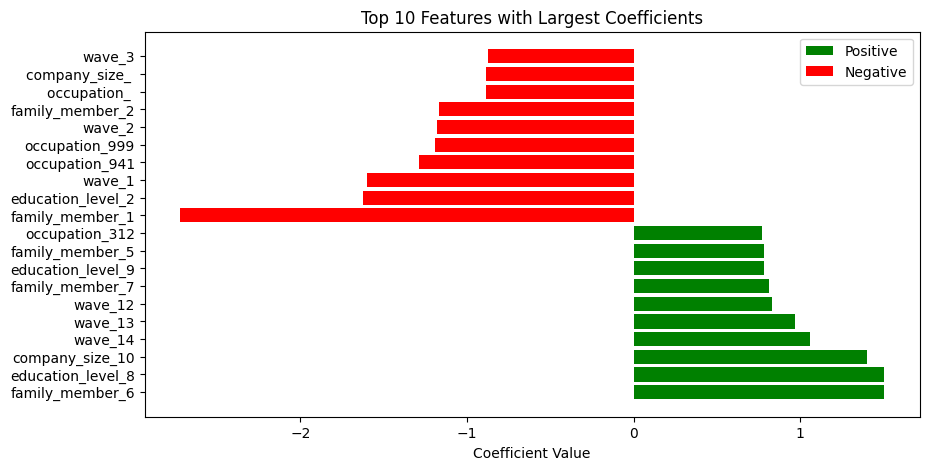

In [34]:

# Plot top 10 positive and negative coefficients
top_positive = positive_features.head(10)
top_negative = negative_features.head(10)
 
plt.figure(figsize=(10, 5))
plt.barh(top_positive['Feature'], top_positive['Coefficient'], color='green', label='Positive')
plt.barh(top_negative['Feature'], top_negative['Coefficient'], color='red', label='Negative')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Features with Largest Coefficients')
plt.legend()
plt.show()


Check coefficients for genders

Coefficient for Male:
    Feature  Coefficient
2  gender_1     0.262131

Coefficient for Female:
    Feature  Coefficient
3  gender_2    -0.283931


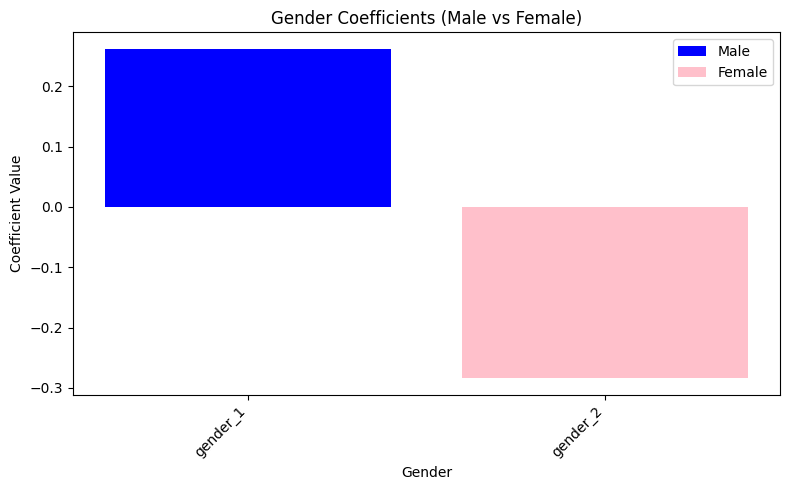

In [ ]:
gender_coefficients = coeff_df[coeff_df['Feature'].str.contains('gender')]

gender_male_coeff = gender_coefficients[gender_coefficients['Feature'] == 'gender_1']
gender_female_coeff = gender_coefficients[gender_coefficients['Feature'] == 'gender_2']

print("Coefficient for Male:")
print(gender_male_coeff)

print("\nCoefficient for Female:")
print(gender_female_coeff)

plt.figure(figsize=(8, 5))
plt.bar(gender_male_coeff['Feature'], gender_male_coeff['Coefficient'], color='blue', label='Male')
plt.bar(gender_female_coeff['Feature'], gender_female_coeff['Coefficient'], color='pink', label='Female')

plt.xlabel('Gender')
plt.ylabel('Coefficient Value')
plt.title('Gender Coefficients (Male vs Female)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Coefficient for Male:
    Feature  Coefficient
2  gender_1     0.262131

Coefficient for Female:
    Feature  Coefficient
3  gender_2    -0.283931


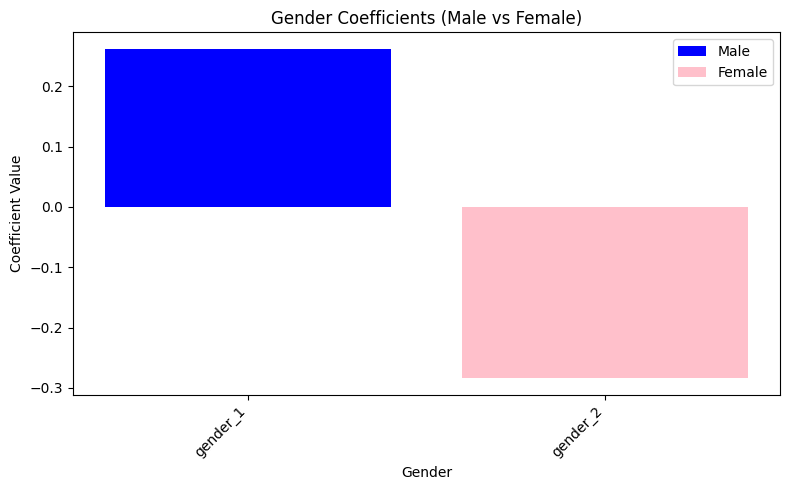

In [37]:
religion_coefficients = coeff_df[coeff_df['Feature'].str.contains('religion')]

religion1_coeff = religion_coefficients[gender_coefficients['Feature'] == 'religion_1']
religion2_coeff = religion_coefficients[gender_coefficients['Feature'] == 'religion_2']
religion9_coeff = religion_coefficients[gender_coefficients['Feature'] == 'religion_9']


print("Coefficient for Male:")
print(gender_male_coeff)

print("\nCoefficient for Female:")
print(gender_female_coeff)

plt.figure(figsize=(8, 5))
plt.bar(gender_male_coeff['Feature'], gender_male_coeff['Coefficient'], color='blue', label='Male')
plt.bar(gender_female_coeff['Feature'], gender_female_coeff['Coefficient'], color='pink', label='Female')

plt.xlabel('Gender')
plt.ylabel('Coefficient Value')
plt.title('Gender Coefficients (Male vs Female)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()